In [3]:
import pandas as pd
import tensorflow as tf
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from livelossplot import PlotLossesKeras
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [4]:
data = pd.read_csv("clean_data.csv")

In [5]:
num_columns = [
    'phones_num',
    'phb_fraud',
    'phb_dirty',
    'phb_all_bad',
    'phb_all',
    'phb_bad_perc',
    'found_phones',
    'phb_fraud_dir',
    'phb_dirty_dir',
    'phb_all_bad_dir',
    'phb_all_dir',
    'phb_bad_perc_dir',
    'found_phones_dir',
    'claims_percent',
    'claims_num',
    'appl_num',
    'complaints_num',
    'complaints_num_dir',
    'mvd_request_num',
    'bad_rep_tcb',
    'total_case_cnt',
    'total_defendant_case_cnt',
    'total_defendant_case_amt',
    'defendant_case_perc',
    'rating_ya',
    'ratings_cnt_ya',
    'reviews_cnt_ya',
    'rating_yell',
    'reviews_cnt_yell',
    'rating_2gis',
    'reviews_cnt_2gis',
    'rating_avito',
    'reviews_cnt_avito'
]
cat_columns = [
    "id",
    "date"
]

In [6]:
data.columns

Index(['id', 'date', 'phones_num', 'phb_fraud', 'phb_dirty', 'phb_all_bad',
       'phb_all', 'phb_bad_perc', 'found_phones', 'phb_fraud_dir',
       'phb_dirty_dir', 'phb_all_bad_dir', 'phb_all_dir', 'phb_bad_perc_dir',
       'found_phones_dir', 'claims_percent', 'claims_num', 'appl_num',
       'complaints_num', 'complaints_num_dir', 'mvd_request_num',
       'bad_rep_tcb', 'total_case_cnt', 'total_defendant_case_cnt',
       'total_defendant_case_amt', 'defendant_case_perc', 'rating_ya',
       'ratings_cnt_ya', 'reviews_cnt_ya', 'rating_yell', 'reviews_cnt_yell',
       'rating_2gis', 'reviews_cnt_2gis', 'rating_avito', 'reviews_cnt_avito'],
      dtype='object')

In [7]:
data.sample(5)

,id,date,phones_num,phb_fraud,phb_dirty,phb_all_bad,phb_all,phb_bad_perc,found_phones,phb_fraud_dir,...,defendant_case_perc,rating_ya,ratings_cnt_ya,reviews_cnt_ya,rating_yell,reviews_cnt_yell,rating_2gis,reviews_cnt_2gis,rating_avito,reviews_cnt_avito
9635,a272410895616a,2022-09-30 00:00:00,1,0,0,0,407,0.0,1,0,...,0.0,-1.0,-1,-1,-1.0,-1,-1.0,-1,-1.0,-1
13934,a720324218351a,2022-09-20 00:00:00,1,0,0,0,137,0.0,1,0,...,0.0,-1.0,-1,-1,-1.0,-1,-1.0,-1,-1.0,-1
9142,a665635001307a,2022-11-01 00:00:00,1,0,0,0,542,0.0,1,0,...,0.0,-1.0,-1,-1,-1.0,-1,-1.0,-1,-1.0,-1
12664,a6726018986a,2022-10-30 00:00:00,2,0,0,0,237,0.0,2,0,...,0.0,-1.0,-1,-1,-1.0,-1,-1.0,-1,-1.0,-1
10723,a051202160321a,2022-10-27 00:00:00,1,0,0,0,372,0.0,1,0,...,0.0,-1.0,-1,-1,-1.0,-1,-1.0,-1,-1.0,-1


In [8]:
data.shape

(15000, 35)

In [9]:
data = np.asarray(data[num_columns]).astype(np.float32)

In [10]:
class AnomalyDetector(tf.keras.Model):
    def __init__(self):
        super(AnomalyDetector, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(33, 1)),
            tf.keras.layers.Dense(1024, activation="sigmoid"),
            tf.keras.layers.Dense(128, activation="sigmoid"),
            tf.keras.layers.Dense(2, activation="sigmoid")])

        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(140,  activation="sigmoid"),
            tf.keras.layers.Dense(32, activation="sigmoid"),
            tf.keras.layers.Dense(33, activation="sigmoid")
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = AnomalyDetector()

In [11]:
autoencoder.compile(optimizer='sgd', loss=tf.keras.losses.BinaryCrossentropy(), metrics=["accuracy"]
)

In [12]:
data.shape

(15000, 33)

In [13]:
train_data, test_data, train_labels, test_labels = train_test_split(
    data, data, test_size=0.2, random_state=21
)

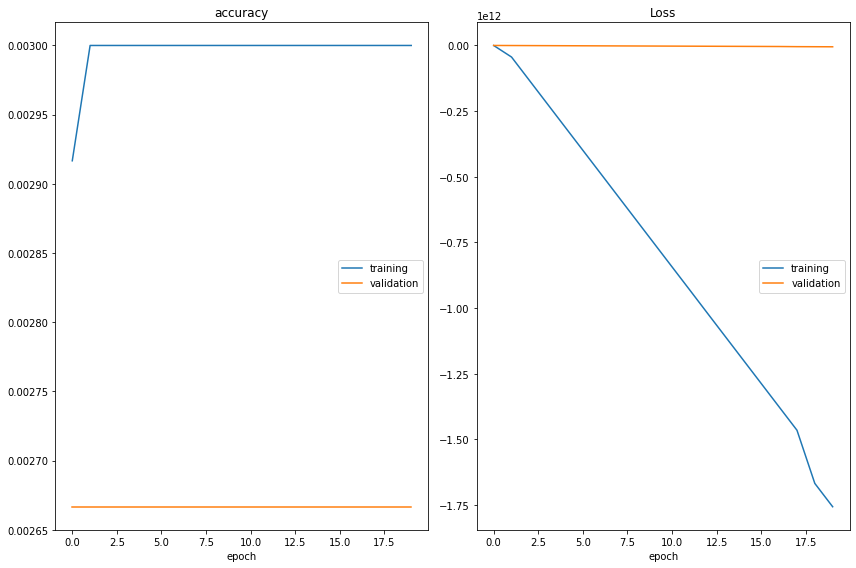

accuracy
	training         	 (min:    0.003, max:    0.003, cur:    0.003)
	validation       	 (min:    0.003, max:    0.003, cur:    0.003)
Loss
	training         	 (min: -1756270428160.000, max: -179303136.000, cur: -1756270428160.000)
	validation       	 (min: -5172246528.000, max: -122784376.000, cur: -5172246528.000)


In [14]:
history = autoencoder.fit(
    train_data, train_data,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_data),
    shuffle=True,
    callbacks=[PlotLossesKeras()], verbose=False
)

In [15]:
autoencoder.predict(data)[:10]

469/469 [==============================] - 1s 1ms/step


array([[1.        , 0.999554  , 0.9820893 , 0.9999999 , 1.        ,
        0.23201635, 1.        , 0.4170521 , 0.34505206, 0.5802654 ,
        1.        , 0.2809637 , 0.9736542 , 0.16473539, 0.24496472,
        0.9980556 , 0.21163927, 0.1494261 , 0.31032395, 0.13730401,
        0.3357665 , 0.27491933, 1.        , 0.34870303, 0.28851384,
        1.        , 1.        , 0.77176356, 0.9411032 , 0.10028004,
        1.        , 0.00992675, 0.11505125],
       [1.        , 0.999554  , 0.9820893 , 0.9999999 , 1.        ,
        0.23201635, 1.        , 0.4170521 , 0.34505206, 0.5802654 ,
        1.        , 0.2809637 , 0.9736542 , 0.16473539, 0.24496472,
        0.9980556 , 0.21163927, 0.1494261 , 0.31032395, 0.13730401,
        0.3357665 , 0.27491933, 1.        , 0.34870303, 0.28851384,
        1.        , 1.        , 0.77176356, 0.9411032 , 0.10028004,
        1.        , 0.00992675, 0.11505125],
       [1.        , 0.999554  , 0.9820893 , 0.9999999 , 1.        ,
        0.23201635, 1.    

In [16]:
data = pd.read_csv("clean_data.csv")

In [17]:
mergings = linkage(data[num_columns].values, method='complete')

In [18]:
mergings[:10]

array([[7.1310e+03, 8.4140e+03, 0.0000e+00, 2.0000e+00],
       [9.7160e+03, 1.0564e+04, 0.0000e+00, 2.0000e+00],
       [1.2040e+04, 1.2554e+04, 0.0000e+00, 2.0000e+00],
       [9.7390e+03, 1.4162e+04, 0.0000e+00, 2.0000e+00],
       [6.1540e+03, 1.2240e+04, 0.0000e+00, 2.0000e+00],
       [3.1480e+03, 1.2943e+04, 0.0000e+00, 2.0000e+00],
       [1.3107e+04, 1.3188e+04, 0.0000e+00, 2.0000e+00],
       [1.0950e+04, 1.4451e+04, 0.0000e+00, 2.0000e+00],
       [1.2390e+04, 1.3577e+04, 0.0000e+00, 2.0000e+00],
       [1.0878e+04, 1.3063e+04, 0.0000e+00, 2.0000e+00]])

In [21]:
model = TSNE(n_components=2, learning_rate='auto',
                                init='random', perplexity=350) # perplexity можно поставить больше, нооооооо...

In [22]:
transformed = model.fit_transform(data[num_columns])

In [23]:
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

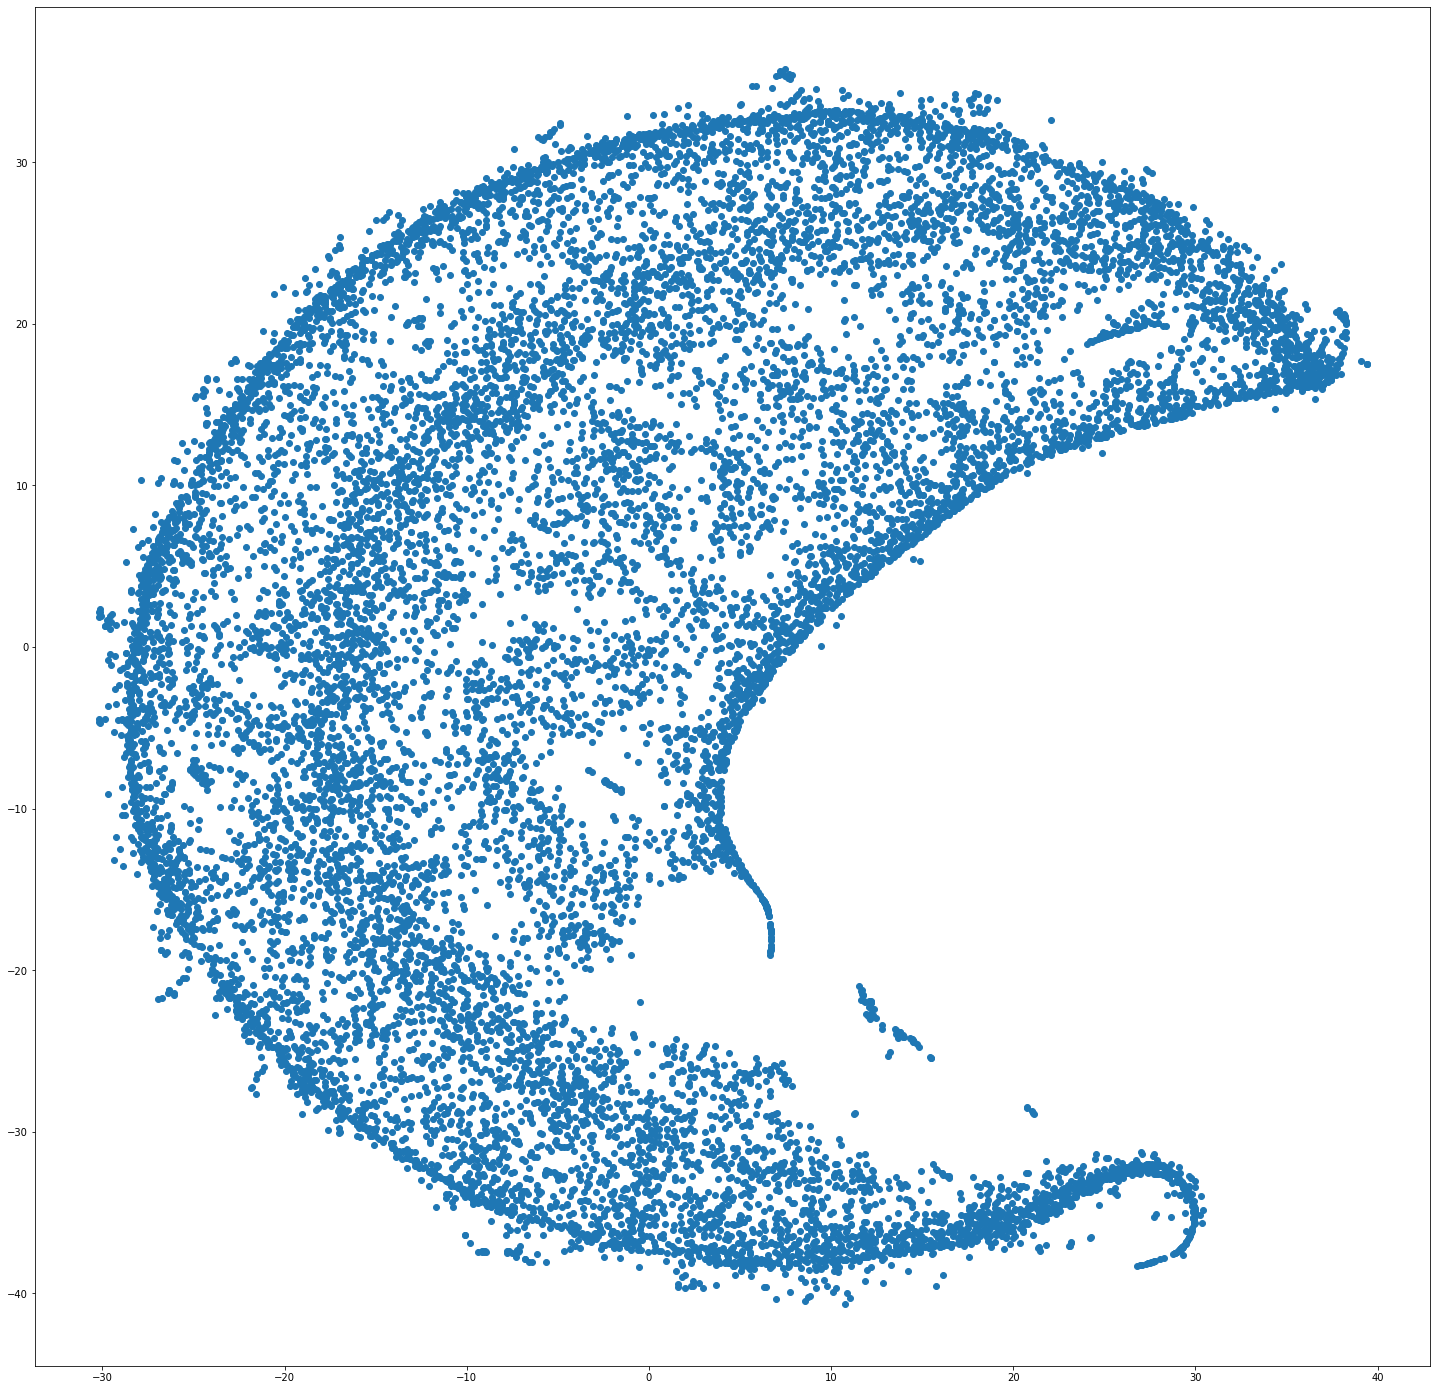

In [25]:
fig = plt.figure(figsize=(25, 25))
plt.scatter(x_axis, y_axis)
name = "figure/TSNE25x25"
plt.savefig(f"{name}.svg")
plt.savefig(f"{name}.jpg")
plt.show()

In [26]:
transformed[:10]

array([[-14.508165 , -18.095802 ],
       [ -8.236219 , -33.841454 ],
       [-20.539202 , -20.410372 ],
       [  6.367451 ,  -0.7822514],
       [ 24.200493 , -36.57563  ],
       [  8.327916 , -38.45709  ],
       [ -3.8410575,  -0.7257049],
       [ 27.811644 ,  27.498346 ],
       [  6.020624 ,   7.060043 ],
       [  7.1496964,  23.752954 ]], dtype=float32)

In [27]:
model_ = KMeans(n_clusters=2)

In [28]:
model_.fit(transformed)

KMeans(n_clusters=2)

In [29]:
pd.Series(model_.predict(transformed)).value_counts()

1    7559
0    7441
dtype: int64

In [32]:
import pickle

In [33]:
with open("models/tsne.bf", "+wb") as file:
    pickle.dump(model, file)

In [34]:
with open("models/kmeans.bf", "+wb") as file:
    pickle.dump(model_, file)